

# Project: Investigating a dataset of medical appointment records

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#observations">First Observations</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#appendix">Appendix</a></li>
</ul>

<a id='intro'></a>
## 1) Introduction

The dataset that is the focus of this project is noshowappointments-kagglev2-may-2016.csv, derived from Kaggle. It contains data about Brazilian citizens scheduled to have doctor appointments, as well as some of their personal information.

The reason behind this choice of this dataset is the lack of information regarding its cleanliness, thus offering more practice in that aspect. Last, but not least, perhaps the predominant reason is the interest in the medical domain and a relevant job acquisition.



The following cells are dedicated towards initializing the project and gathering the data.


In [1]:
# Importing the necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
#   Loading the dataset/Gathering the data. Since the dataset was already available there was no need to invest further
#   into this process

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#   Assessing the dataset column and value numbers

df.shape


df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [4]:
#   Assessing the dataset's column names, types, and checking out for null values
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [5]:
#  Checking out whether there are any duplicate values
df.duplicated().sum().any()

False

In [6]:
#  Taking a fist look at our data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='observations'></a>
### 1.1) First observations
    By glancing over our data, several issues have been identified:
1. **Column names** 

        The column names of our dataset may be descriptive, however they appear to have a number of issues, listed below:
        * They are not in small letters 
        * Column names that are comprised of more than one word are not separated with an underscore
        * Some column names are not descriptive or are obscure(No-show)
        * Some column names contain spelling mistakes

2. **Column Redundancy**
    
       Furthermore, there appears to be redundant column in our dataset. Specifically, the columns named 'ScheduledDay' and 'AppointmentDay' contain similar data
    
3. **Value Cleanliness**

        There seems to be garbage/unnecessary characters in specific columns, like 'ScheduledDay' and 'AppointmentDay'

4. **Value Consistency**

        It has been observed that there are no null values and every entry is unique.


5. **Variable Typing**

        Almost all existing values that are relative to this report's research are of a type that does not hinder this report's objective, with the sole exception of the 'ScheduledDay' and 'AppointmentDay'. 



      The observations regarding column redundancy, value consistency and redundancy are to be addressed and tackled in the following part of this report, named "Data Wrangling".

<a id='wrangling'></a>
## 2) Data Wrangling

> In this section of the report, the various inconsistencies and errors of the dataset are presented and tackled in order of appearance.
### 2.1 Data Cleaning

#### 2.1.1 Adressing Column Naming Convention

> In the following cell, the first observation regarding the column names is fixed:

In [7]:
#  Since the 'No-show' column's encoding is reversed, the values themselves will also have to be reversed accordingly.

df.rename(columns= {'PatientId':'patiend_id','AppointmentID':'appointment_id','Gender':'gender','ScheduledDay':'scheduled_day',
                   'AppointmentDay':'appointment_day','Age':'age','Neighbourhood':'neighborhood','Scholarship':'scholarship',
                   'Hipertension':'hypertension','Diabetes':'diabetes','Alcoholism':'alcoholism','Handcap':'handicap',
                   'SMS_received':'sms_received','No-show':'attendance'}, inplace=True)

df['attendance'].replace({'No':'Yes','Yes':'No'}, inplace=True)

df['attendance'].value_counts()

Yes    88208
No     22319
Name: attendance, dtype: int64

In [8]:
df.head()

,patiend_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes



#### 2.1.2 Adressing Column Redundancy

> In the following cell, the second observation regarding column redundancy is tackled. To elaborate on that, the columns "scheduled_day" and "appointment_day" contain redundant data, and therefore shall be replaced by a single column.
It was decided that since the 'scheduled day' column contains both the date *and* time that corresponds to an appointment, the 'appointment_day' column should be pruned. Furthermore, the 'scheduled_day' column is split in two columns, the one containing the appointment's day, and the other containing the appointment's time, named 'date' and 'time' respectively.

In [9]:
# Splitting the 'scheduled_day' into two columns and storing them in a temporary dataframe by first turning it into a string
dfs = df['scheduled_day'].str.split("T", n=1, expand=True)
dfs.isna().sum().any()

False

> Since the Series.split() turns the columns into a 'RangeIndex' type, they had be to converted into strings first to be renamed.

In [10]:
# Converting the temporary dataframe's columns into strings and renaming them
dfs.columns = dfs.columns.astype(str)
dfs.rename(columns= {'0':'appointment_date','1':'appointment_time'}, inplace=True)

In [11]:
# Removing the e
dfs['appointment_time'] = dfs['appointment_time'].map(lambda x: x.rstrip('Z'))

In [12]:
dfs.head()

,appointment_date,appointment_time
0,2016-04-29,18:38:08
1,2016-04-29,16:08:27
2,2016-04-29,16:19:04
3,2016-04-29,17:29:31
4,2016-04-29,16:07:23


In [143]:
# After the columns including the date and time of each appointment on the temporary dataframe are cleaned,
# they get concatenated along with the original dataframe to create a new dataframe with the renewed columns
cleandf = pd.concat([df,dfs], axis=1, ignore_index=False)

In [144]:
cleandf.drop(['scheduled_day','appointment_day'], axis=1, inplace = True)

In [145]:
cleandf = cleandf[['patiend_id','appointment_id','gender','appointment_date','appointment_time','age',
               'neighborhood','scholarship','hypertension','diabetes','alcoholism','handicap','sms_received','attendance']]


#### 2.1.3 Adressing Value Redundancy

> In the following cell, the values of the column 'appointment_time' are cleaned from the unnecessary characters within their rows

In [146]:
cleandf.head()

,patiend_id,appointment_id,gender,appointment_date,appointment_time,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29,18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29,16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29,16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29,17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29,16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [183]:
cleandf.info()
cleandf.head(1)
#cleandf.appointment_id.duplicated().sum().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   patiend_id        110527 non-null  float64
 1   appointment_id    110527 non-null  int64  
 2   gender            110527 non-null  object 
 3   appointment_date  110527 non-null  object 
 4   appointment_time  110527 non-null  object 
 5   age               110527 non-null  int64  
 6   neighborhood      110527 non-null  object 
 7   scholarship       110527 non-null  int64  
 8   hypertension      110527 non-null  int64  
 9   diabetes          110527 non-null  int64  
 10  alcoholism        110527 non-null  int64  
 11  handicap          110527 non-null  int64  
 12  sms_received      110527 non-null  int64  
 13  attendance        110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,patiend_id,appointment_id,gender,appointment_date,appointment_time,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29,18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes


In [147]:
cleandf.to_csv('noshowappointments-kagglev2-may-2016-cleaned.csv')


> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).


<a id='eda'></a>

## 3) Exploratory Data Analysis

    This section of the report is dedicated towards exploring the cleaned dataset that was generated by the "Data Wrangling" section. It addresses three(3) separate questions imposed on the data, each one assigned to its own subsection.


Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 3.1 Question No.1: How many people who have received an SMS attended their appointment as opposed to those who didn't?

For this question, a couple of speculations had to be made as to what the "sms_received" feature is supposed to indicate:
    * It is directly related to the rest of the data
    * It is an indicator of someone receiving an SMS notification regarding their imminent appointment

    Therefore, it was hypothesized that those who received an SMS notification and attended their appointment were far more than those who didn't receive one. In order to answer this question, the 'sms'received' and 'attendance' columns were selected and visualized on the same graph. The graph selected for this question was of 'bar' type so as to communicate the findings as best as possible.

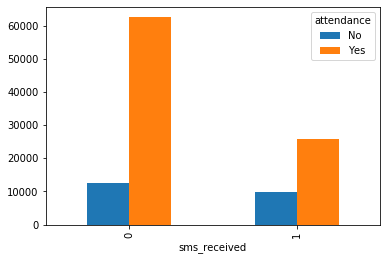

In [149]:
#dfsms = cleandf.query('sms_received == "1"')
#dfnosms = cleandf.query('sms_received == "0"')
cleandf.groupby(['sms_received','attendance']).size().unstack().plot(kind='bar');

###  Question No.2: In which months of the year do the most appointments take place?

    First things first, in order to tackle this question, the variable that must be acquired is the 'appointment_date'. However, since the 'appointment_date' is of type 'string', it will have to be transformed into 'datetime'. Furthermore, the question explored is focused on a continuous variable, the graph chosen to visualize it is a histogram. Last, but not least, the 'appointment_date' and 'appointment_time' columns are aggregated, then the 'appointment_time' column is dropped for the temporary dataframe used to answer this question.
    

In [235]:
tempodf = cleandf.copy()

In [236]:
tempodf['appointment_date'] = cleandf[['appointment_date', 'appointment_time']].agg('-'.join, axis=1)

In [237]:
tempodf.drop(['appointment_time'], axis=1, inplace=True)

In [240]:
#checking out the changes on the temporary dataframe
tempodf.head()

,patiend_id,appointment_id,gender,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29-18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29-16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29-16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29-17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29-16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [248]:
# Changing the type of 'appointment_date' from str to datetime and making sure it works no matter the format
tempodf['appointment_date'] = pd.to_datetime(tempodf['appointment_date'], infer_datetime_format=True)

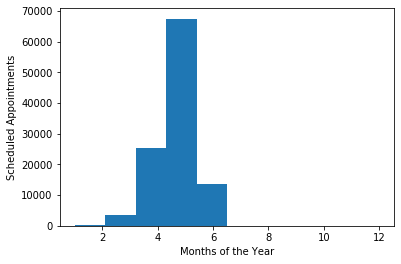

In [249]:
# Visualizing our data by mapping according to months of a year. The same way the data can be visualized
# based on the day of a month by changing d.month to d.day Note that this won't work unless the cell above is executed first
d = tempodf['appointment_date'].map(lambda d: d.month).plot(kind='hist')
plt.ylabel('Scheduled Appointments')
plt.xlabel('Months of the Year')
plt.show()

###  Question No.3: Which age groups tend to skip their appointments more frequently?

In order to answer this question, the 'age' feature will have to be split into specific categories. The approach for this
procedure was to split the age groups into **five** categories: **Juveniles**(0-17), **Young adults**(18-29),Adults(30-45),
**Older Adults**(46-64),**Old Adults**(65-99). In order to categorize our age groups, the pandas.split() method is utilized below:

In [250]:
tempodf.head()

,patiend_id,appointment_id,gender,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [171]:
#First things first, we have to split our data in five(5) bins, then create a copy of the clean dataset to perform analysis
bin_edges = [0,17,29,45,64,99]
bin_names = ['Juveniles(0-17)','Young Adults(18-29)','Adults(30-45)','Older Adults(46-64)','Old Adults(65-99)']
cleandf1 = cleandf.copy()
cleandf1['age'] = cleandf1['age'].astype(int)

In [172]:
#Then we cut the 'age' column into the specified
cleandf1['age_category'] = pd.cut(cleandf1['age'], bin_edges, labels=bin_names)

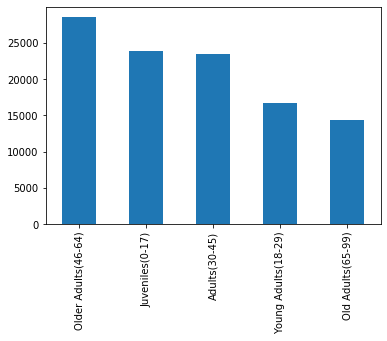

In [174]:
#From the bar graph below, it can be derived that the group 'Older Adults(65-99) is the most representative one.
cleandf1['age_category'].value_counts().plot(kind='bar');

After gaining some insight regarding the nature of the patients in our dataset, we can 

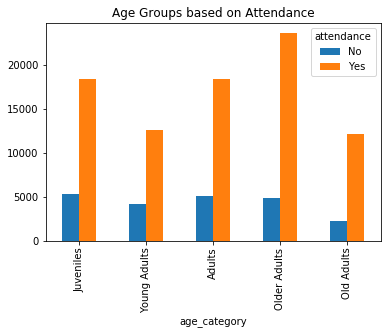

In [155]:
#
cleandf1.groupby(['age_category', 'attendance']).size().unstack().plot(kind='bar', title='Age Groups based on Attendance');

<a id='conclusions'></a>
## 4) Conclusions

    In this final part of the report, the exploratory analysis findings are documented, presented and discussed, as well as the limitations imposed by the nature of the data. It is structured in two parts, its first being "Explorartory Analysis Findings", and second "Limitations".


### 4.1 Exploratory Analysis Findings

> **Question No.1**: How many people who have received an SMS attended their appointment as opposed to those who didn't?

    First things first, the findings derived from EDA practised on the 'sms_received' and 'attendance' columns yielded that the factor of whether someone received an SMS or not did not 


> **Question No.2**: At what time of the year do most appointments take place?

    The findings that were gained by exploring the dataset in regards to this question were fairly interesting. To elaborate on that, the majority of scheduled appointments take place between the middle of March and the middle of June.

> **Question No.3**: Which age groups tend to skip their appointments more frequently?
    
### 4.2 Limitations

    A very important factor that imposes a limitation to the research is the lack of more detailed economic data, like financial status of every patient. The existence of said data could theoritically have an impact on whether people attend their appointments or not.
    
    Last, but not least, a very noteworthy limitation imposed by the type of data had an impact on the type of analysis that could be . To elaborate on that, although not all the types of independent data on this dataset were of the categorical type, the dependant variables in question were. 
